In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt  
from mlxtend.data import iris_data
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [38]:
class LogisticRegression:
    def __init__(self, Lr = 0.1, epochs = 1000, L2_term = 0):
        # Lr : Learning rate
        # epochs : Number of epochs
        # L2_term : Regularization term

        self.Lr = Lr
        self.epochs = epochs
        self.L2_term = L2_term
        self.Weights = None
        self.bias = None
        self.targets = None
        
    # Stable Softmax function is used when more than two clases are defined.
    def Softmax(self, x):

        # Substracting max value of each row of z before exponentiating to prevent overflow.
        exponent = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exponent / np.sum(exponent, axis=1, keepdims=True)

    
    def fit(self, X, y, Lr = 0.01, epochs = 1000, L2_term = 0):
        self.Lr = Lr
        self.epochs = epochs
        self.L2_term = L2_term
        self.Loss = [] # To keep track of losses over epochs

        Dimensions = X.shape[1]
        # Finding the number of targets for classification
        self.targets = len(np.unique(y)) 

        # Initializing weights and biases
        self.Weights, self.bias = np.random.randn(Dimensions, self.targets), np.random.randn(self.targets)
        
        # One hot encoding the target values
        One_hot_y = self.hot_encoding(y)
        
        # No of epochs
        for _ in range(self.epochs):
            # Finding the matrix product output.
            Y = np.dot(X, self.Weights) + self.bias

            # Applying Softmax over the output
            y_pred = self.Softmax(Y)

            # Finding the cross entropy loss
            loss = self.Cross_entropy_loss(y_pred, One_hot_y)

            # Finding the gradients dw and db for updating weights.
            derivatives = self.Derivatives(X, y_pred, One_hot_y)

            # Updating the weights using the gradient - dw
            self.Weights -= self.Lr * (derivatives["dW"] + self.L2_term * self.Weights)

            # Updating the bias using the gradient - db
            self.bias -= self.Lr * derivatives["db"]

            # Apending the loss per 100 iterations
            if _ % 100 == 0:
                self.Loss.append(loss)
    
    # Function fro one hot encoding the data.
    def hot_encoding(self, y):
        return np.eye(self.targets)[y]
    
    # Function for finding the cross entropy loss
    def Cross_entropy_loss(self, y_pred, One_hot_y):
        # Cross entropy loss equation
        loss = -np.sum(One_hot_y * np.log(y_pred)) / y_pred.shape[0]

        # Regularization Term
        L2_term = (self.L2_term / 2) * np.sum(np.square(self.Weights))
        return loss + L2_term

    
    def Derivatives(self, X, y_pred, One_hot_y):
        # Finding the derivative of weights
        dw = np.dot(X.T, (y_pred - One_hot_y) / y_pred.shape[0])

        # Finding the derivative of bias
        db = np.sum((y_pred - One_hot_y) / y_pred.shape[0], axis=0)
        return {"dW": dw, "db": db}

    # The prediction function finds the predcitions by appplying armax function over the softmax output.
    def predict(self, X):
        return np.argmax(self.Softmax(np.dot(X, self.Weights) + self.bias), axis=1)
    
    # The Accuracy function finds the predictions from the X_test first and then compares them with the y_test.
    def Accuracy(self, X_test, y_test):
        # Finding the predictions.
        y_pred = self.predict(X_test)

        # Comparing matching values between the predictions and the y_test.
        c_pred = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i]])

        # Returns the percetage of the Accurate predictions
        return (c_pred/len(y_test))*100

In [39]:
# Loading and splitting the iris data and targets into X and Y components
X, Y= iris_data()
"""
1st Feature sepal length in cm
2nd Feature sepal width in cm
3rd Feature petal length in cm
4th Feature petal width in cm
"""

# splitting the iris data into Training and Testing components
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle = True)

In [40]:
# Defining the logistic classifier object
L_G = LogisticRegression()

In [41]:
Accuracy_lst = {}
L_G.fit(X_train[:, [0,1]], y_train)
Accuracy_lst['LG_S'] = L_G.Accuracy(X_test[:, [0,1]], y_test)
print("Accuracy of Sepal Features vs Target L_G model", Accuracy_lst['LG_S'])

L_G.fit(X_train[:, [2,3]], y_train)
Accuracy_lst['LG_P'] = L_G.Accuracy(X_test[:, [2,3]], y_test)
print("Accuracy of Petal Features vs Target L_G model", Accuracy_lst['LG_P'])

L_G.fit(X_train, y_train)
Accuracy_lst['LG_A'] = L_G.Accuracy(X_test, y_test)
print("Accuracy of All Features of Iris Data vs Target L_G model", Accuracy_lst['LG_A'])

Accuracy of Sepal Features vs Target L_G model 73.33333333333333
Accuracy of Petal Features vs Target L_G model 66.66666666666666
Accuracy of All Features of Iris Data vs Target L_G model 93.33333333333333


In [42]:
def plot_decision_region(X_T, y_T, X_t, y_t, model, title):
    grid = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 8))
    for clf, label, grd in zip([model],[title],itertools.product([0, 1], repeat=2)):
        clf.fit(X_T, y_T)
        ax = plt.subplot(grid[grd[0], grd[1]])
        fig = plot_decision_regions(X = X_t, y = y_t, clf = clf, legend=2)
        print("Accuracy = ", clf.Accuracy(X_t, y_t))
        plt.title(label)
    plt.show()

**Logistic Regression with Sepal Features vs Targets**

Accuracy =  80.0


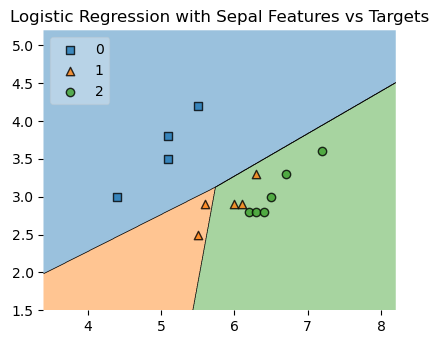

In [54]:
plot_decision_region(X_T = X_train[:, [0,1]], 
                     y_T = y_train, 
                     X_t  = X_test[:, [0,1]], 
                     y_t = y_test, 
                     model = L_G, 
                     title = 'Logistic Regression with Sepal Features vs Targets')

**Logistic Regression with Petal Features vs Targets**

Accuracy =  73.33333333333333


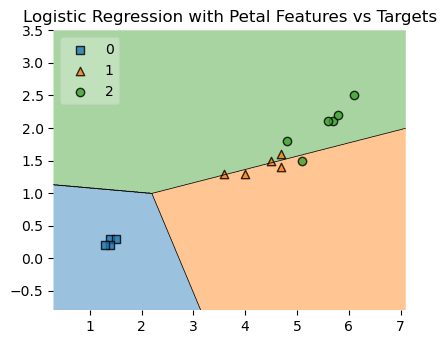

In [60]:
plot_decision_region(X_T = X_train[:, [2,3]], 
                     y_T = y_train, 
                     X_t  = X_test[:, [2,3]], 
                     y_t = y_test, 
                     model = L_G, 
                     title = 'Logistic Regression with Petal Features vs Targets')

**Linear Discriminant Analysis**

In [45]:
class LDA:
  
  # Initializing the LDA objects
  def __init__(self):
     
     # Inializing the Unique classes as None
     self.U = None

     # Initializing the the class means as None
     self.c_m = None

     # Initializing the shared covariance matrix as None
     self.shared_cov = None

  def fit(self, data, target):
    # Finding the Uniques elements of the target.
    self.U = np.unique(target)

    # Initializing an empty array with dimensions (number of classes, number of features)
    self.c_m = np.zeros((len(self.U), data.shape[1]))
    
    # Finding the class means and class priors of the target.
    for idx, ele in enumerate(self.U): 

        # like_data selects the subset of the input data that belongs to that class.
        like_data = data[target == ele]

        # Means of each feature across all samples.
        self.c_m[ele] = like_data.mean(axis=0)
    
    # Intializing the covariance matrix with dimensions (number of features, number of features)
    self.shared_cov = np.zeros((data.shape[1], data.shape[1]))

    # Finding the class priors = c_p
    self.c_p = np.array([np.mean(target == ele) for ele in self.U])

    # get covariance MAtrix
    for idx, ele in enumerate(self.U):

        # like_data selects the subset of the input data that belongs to that class.
        like_data = data[target == ele]
        
        # Finding the Centered data matrix = C_d_m
        C_d_m = like_data - self.c_m[ele]

        # Covariance Matrix = C_M
        C_M = (C_d_m).T @ (C_d_m)

        # Updates shared covariance matrix of all classes.
        self.shared_cov +=  C_M

    # Finding average covariance matrix of all classes to get a better estimate.
    self.shared_cov /= data.shape[0] - len(self.U)

  # Defining the predict method.
  def predict(self, data):
      
      # Initializing an empty 2D array for storing Discriminant Scores.
      D_S = np.zeros((data.shape[0], len(self.U)))
      
      # Iterating over each sample
      for idx1, ele1 in enumerate(data):
          
          # Iterating over each class.
          for idx2, ele2 in enumerate(self.U):
              
              # Finding the difference between the input feature vector ele1 and the mean of class ele2.
              c_m = ele1 - self.c_m[ele2]
              
              # Finding the prior Probability = p_p of the class 
              p_p = np.log(self.c_p[idx2])

              # Finding the inverse of shared covariance matrix.
              shared_cov_inv = np.linalg.inv(self.shared_cov) 
              
              """
              Discriminant function D_k(x) = x.T @ w_k - 0.5 * w_k.T @ S_w @ w_k + ln(P(w_k))
              x - input feature vector
              w_k - weight vector or class means
              S_w - shared covariance matrix
              ln(p(w_k)) - prior probability
              """
              # Finding the discriminant function for each input feature and each class.
              D_S[idx1, idx2] = -0.5 * c_m @ shared_cov_inv @ c_m.T + p_p

        # Predict method returns the class with the maximum discriminant value for each input feature vectors.
      return self.U[np.argmax(D_S, axis=1)]
  
  # The Accuracy function finds the predictions from the X_test first and then compares them with the y_test.
  def Accuracy(self, X_test, y_test):
      # Finding the predictions.
      y_pred = self.predict(X_test)

      # Comparing matching values between the predictions and the y_test.
      c_pred = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i]])

      # Returns the percetage of the Accurate predictions
      return (c_pred/len(y_test))*100

In [46]:
# Define LDA objects for different feature sets
LDA_ = LDA()


**LDA with Sepal Features vs Targets**

Accuracy =  86.66666666666667


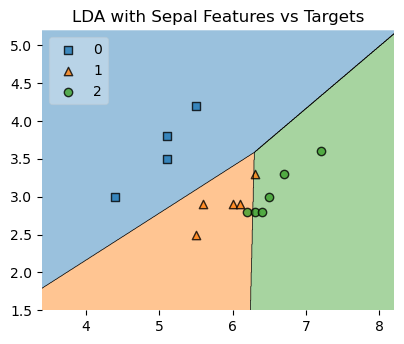

In [47]:
plot_decision_region(X_T = X_train[:, [0,1]], 
                     y_T = y_train, 
                     X_t  = X_test[:, [0,1]], 
                     y_t = y_test, 
                     model = LDA_, 
                     title = 'LDA with Sepal Features vs Targets')
Accuracy_lst['LDA_S'] = LDA_.Accuracy(X_test[:, [0,1]], y_test)

**LDA with Petal Features vs Targets**

Accuracy =  93.33333333333333


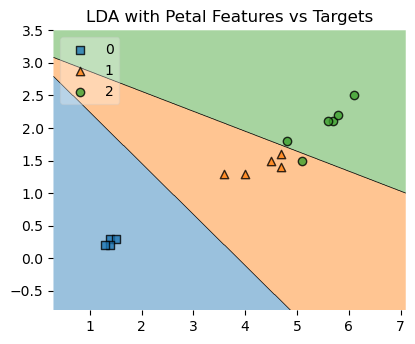

In [48]:
plot_decision_region(X_T = X_train[:, [2,3]], 
                     y_T = y_train, 
                     X_t  = X_test[:, [2,3]], 
                     y_t = y_test, 
                     model = LDA_, 
                     title = 'LDA with Petal Features vs Targets')
Accuracy_lst['LDA_P'] = LDA_.Accuracy(X_test[:, [2,3]], y_test)

**LDA with all features vs Target**

In [49]:
LDA_.fit(X_train, y_train)
print("Accuracy = ", LDA_.Accuracy(X_test, y_test))
Accuracy_lst['LDA_A'] = LDA_.Accuracy(X_test, y_test)

Accuracy =  93.33333333333333


**Comparison of 3 different models made using Logistic Regression and LDA**

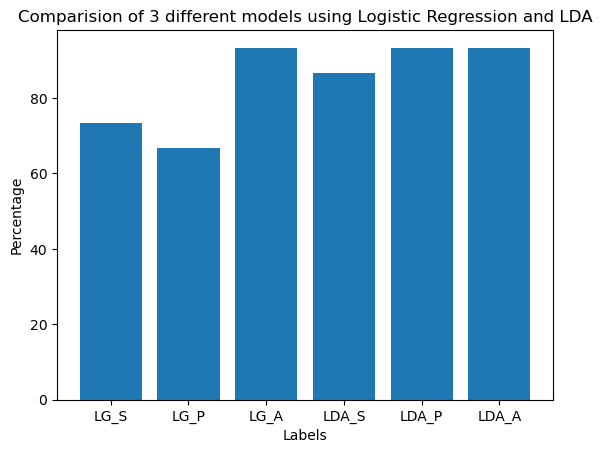

In [50]:
labels, values = list(Accuracy_lst.keys()), list(Accuracy_lst.values())

plt.bar(labels, values)

# Setting title for the plot
plt.title('Comparision of 3 different models using Logistic Regression and LDA')
plt.xlabel('Labels')
plt.ylabel('Percentage')
plt.show()